In [1]:
#balldrop.ipynb
#Author: Kyle Larson
#purpose, demonstrate that there is acceleration due to gravity and practice scatterplotts
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
data = {'height':[], 'time':[]}
data['height'] = [205.74,205.74,205.74,205.74,205.74,205.74,
                  287.02, 287.02, 287.02, 287.02, 287.02, 287.02, 
                 246.38,246.38,246.38,246.38,246.38,246.38,
                 190.5,190.5,190.5,190.5,190.5,190.5]
data['time'] =[ .61,.57,.72,.74,.65,.68,
               .55,.72,.55,.85,.72,.85,
               .54,.74,.65,.76,.62,.67,
               .64,.70,.64,.59,.64,.48,  ]
fall_data = pd.DataFrame(data)
fall_data.head()

,height,time
0,205.74,0.61
1,205.74,0.57
2,205.74,0.72
3,205.74,0.74
4,205.74,0.65


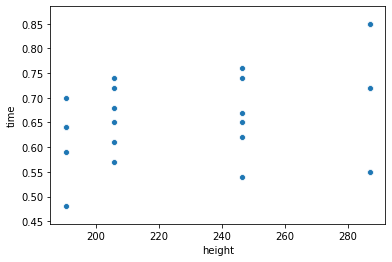

In [2]:
sns.scatterplot(x=fall_data['height'], y=fall_data['time'] )

In [3]:
means = [ statistics.mean(data['time'][18:23]),
         statistics.mean(data['time'][0:6]),  statistics.mean(data['time'][12:18]),
         statistics.mean(data['time'][6:11]) ]
print(means)
print(str(statistics.mean(means[1:3]))+" at "+str(statistics.mean([data['height'][0],data['height'][13]])))


[0.642, 0.6616666666666666, 0.6633333333333333, 0.678]
0.6625 at 226.06


In [4]:
prediction = {'height':[],'time':[]}
for n in range(190, 287):
    prediction['height'].append(n)
    #prediction['time'].append()

In [5]:
print(prediction)

{'height': [190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286], 'time': []}


In [17]:
from numpy import array
from sympy import *
xmid = 246.38
print(xmid)
ymid = means[2]
print(ymid)
p1 = [190.5, means[0]]
p2 = [287.02, means[len(means)-1]]
M = Matrix([[p1[0]**2, p1[0], 1, p1[1]], [xmid**2, xmid, 1, ymid], [p2[0]**2, p2[0], 1, p2[1]]])
print("Matrix : {} ".format(M))
   
# Use sympy.rref() method 
M_rref = M.rref()  
print(M_rref)

246.38
0.6633333333333333
Matrix : Matrix([[36290.2500000000, 190.500000000000, 1, 0.642000000000000], [60703.1044000000, 246.380000000000, 1, 0.663333333333333], [82380.4804000000, 287.020000000000, 1, 0.678000000000000]]) 
(Matrix([
[1, 0, 0, -2.16308247608514e-7],
[0, 1, 0, 0.000476271207725825],
[0, 0, 1,    0.559120215311005]]), (0, 1, 2))


In [18]:
def quad(qc, x):
    y = qc[0]*(x**2)+qc[1]*x+qc[2]
    return y
prediction['time'] = []
for n in range(190, 287):
    prediction['time'].append(quad([-2.16308247608514e-7,0.000476271207725825,0.559120215311005],n))

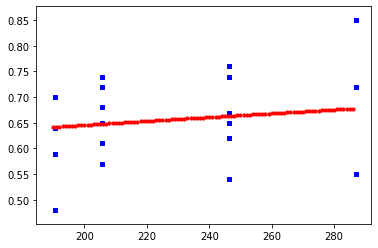

In [22]:
import matplotlib.pyplot as plt
plt.scatter(fall_data['height'], fall_data['time'], s=10, c='b', marker="s", label='experimental')
plt.scatter(prediction['height'],prediction['time'], s=10, c='r', marker="o", label='quad')

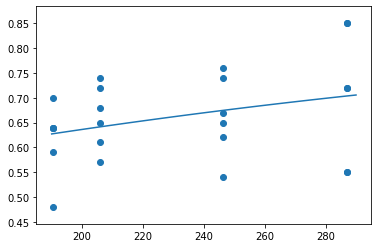

In [20]:
import numpy as np

#polynomial fit with degree = 2
model = np.poly1d(np.polyfit(data["height"], data["time"], 2))

#add fitted polynomial line to scatterplot
polyline = np.linspace(190, 290, 50)
plt.scatter(data["height"], data["time"])
plt.plot(polyline, model(polyline))
plt.show()